# Observations 

1. The primary observation of the analysis shows that Capomulin and Ramicane are the best drug regimens of the ones selected.  This is due to their signifantly lower respective tumor volumes than the rest of the study and is confidently backed by the two drugs substantially leading in test counts.

2. A secondary observation is that through the box plot it shows that both Capomulin and Ramicane have significantly lower tumor volume averages even when compared to the next two best treatment options.  Furthermore, their respective interquartile ranges are not high and shows that the average data would be expected in future patients.  Additionally, the outliers that were present actually benefit thier results because they showed below average results, which translates to drastic reductions in tumor volume.

3. The third and final observation that was noted, deals with the relationship between tumor volume and mouse weight.  The scatter plot and linear regression analysis shows a positive correlation between the weight of the mice and their tumor volumes.  This observation is useful for narrowing the causation of larger tumor volumes.  Future research can attempt to uncover if this correlation is caused simply by a larger mouse having more surface area for the tumor to grow or if the drug regimens aren't productive enough to slow large scale growth.




In [1]:
# dependencies and data
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sem
import numpy as np

mice_data = "resources/Mouse_metadata.csv"
study_results = "resources/Study_results.csv"

mice_df = pd.read_csv(mice_data)
study_df = pd.read_csv(study_results)

#Merging to a single dataset on mouse ID
mousestudy_df = pd.merge(mice_df,study_df, how = 'left', on = "Mouse ID")
mousestudy_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#Summary Statistics Table of Tumor volume
drug_reg = mousestudy_df.groupby("Drug Regimen")
avg_tumor = drug_reg["Tumor Volume (mm3)"].mean()
med_tumor = drug_reg["Tumor Volume (mm3)"].median()
var_tumor = drug_reg["Tumor Volume (mm3)"].var(ddof=0)
std_tumor = drug_reg["Tumor Volume (mm3)"].std(ddof=0)
sem_tumor = drug_reg["Tumor Volume (mm3)"].sem()


summary_stats_drugs = pd.DataFrame({"Average Tumor Volume (mm3)": avg_tumor,
                                   "Median Tumor Volume (mm3)" :med_tumor,
                                   "Tumor Volume (mm3) Variance":var_tumor,
                                   "Tumor Volume (mm3) Standard Deviation":std_tumor,
                                   "SEM Tumor Volume (mm3)": sem_tumor})
summary_stats_drugs



,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.322552,50.854632,42.088020,6.487528,0.512884
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


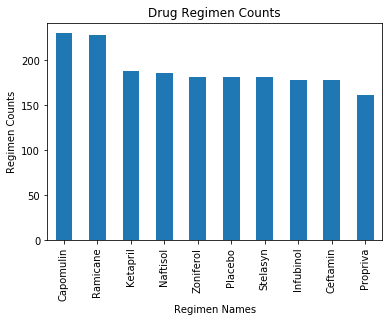

<Figure size 432x288 with 0 Axes>

In [3]:
#Creating a Bar Plot for Regimens Pandas
# regimen_group = mousestudy_df.groupby("Drug Regimen")
# regimen_count = regimen_group["Drug Regimen"].count()

regimen_count = mousestudy_df["Drug Regimen"].value_counts()


bar_plot = regimen_count.plot(kind="bar")
bar_plot.set_title("Drug Regimen Counts")
bar_plot.set_ylabel("Regimen Counts")
bar_plot.set_xlabel("Regimen Names")


plt.show()
plt.tight_layout()                             

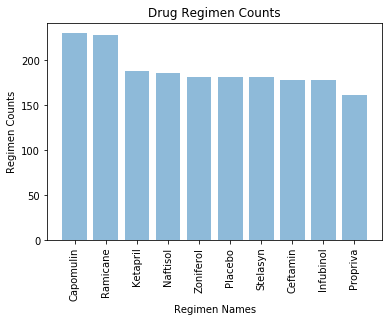

<Figure size 432x288 with 0 Axes>

In [4]:
#Creating a Bar Plot with Matplot
x_axis = np.arange(len(regimen_count))
drug_names = ["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Placebo","Stelasyn","Ceftamin","Infubinol",
              "Propriva"]
# drug_names = regimen_count.keys()
#Try using that for names later
plt.bar(x_axis, regimen_count, alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_names, rotation="vertical")
plt.xlabel("Regimen Names")
plt.ylabel("Regimen Counts")
plt.title("Drug Regimen Counts")


plt.show()
plt.tight_layout()

In [5]:
#Female Versus Male Distribution data setup
sex_count = mousestudy_df["Sex"].value_counts()

labels = ["Male","Female"]
colors = ["lightskyblue","pink"]

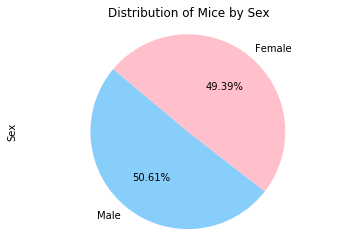

<Figure size 432x288 with 0 Axes>

In [6]:
#Matplot Pie Chart
plt.pie(sex_count, labels=labels, colors=colors,
        autopct="%1.2f%%",startangle=140)
plt.axis("equal")
plt.title("Distribution of Mice by Sex")
plt.ylabel("Sex")
plt.show()
plt.tight_layout()

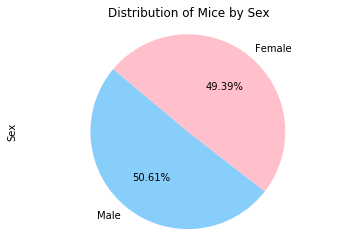

<Figure size 432x288 with 0 Axes>

In [7]:
# Pandas Pie Chart
sex_count.plot(kind="pie",y=labels,colors=colors,title="Distribution of Mice by Sex",autopct="%1.2f%%",startangle=140)


plt.axis("equal")
plt.show()
plt.tight_layout()

In [8]:
#Quartiles, Outliers, and Boxplot Set up
regimen_index = mousestudy_df.set_index("Drug Regimen")
capomulin = regimen_index.loc["Capomulin","Tumor Volume (mm3)"]
ramicane = regimen_index.loc["Ramicane","Tumor Volume (mm3)"]
infubinol = regimen_index.loc["Infubinol","Tumor Volume (mm3)"]
ceftamin = regimen_index.loc["Ceftamin","Tumor Volume (mm3)"]
var = [capomulin,ramicane,infubinol,ceftamin]
names = ["capomulin","ramicane","infubinol","ceftamin"]
top4 = regimen_index.loc[["Capomulin","Ramicane","Infubinol","Ceftamin"],["Tumor Volume (mm3)","Timepoint"]]
final_top4 = top4.loc[top4["Timepoint"] == 45,:]


In [9]:
#Finding Quartiles, IQR, and any potential outliers in Final Tumor Volume of the Top 4 Treatments
quartiles = top4['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
#Findings
print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")
#Bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
#Potential Outliers
outlier_tumor = top4.loc[(top4['Tumor Volume (mm3)'] < lower_bound) | (top4['Tumor Volume (mm3)'] > upper_bound)]
outlier_tumor

The lower quartile of Tumor Volume (mm3) is: 40.2201707875
The upper quartile of Tumor Volume (mm3) is: 50.356470630000004
The interquartile range of Tumor Volume (mm3) is: 10.136299842500001
The the median of Tumor Volume (mm3) is: 45.0 
Values below 25.01572102375 could be outliers.
Values above 65.56092039375001 could be outliers.


,Tumor Volume (mm3),Timepoint
Drug Regimen,,
Capomulin,23.343598,45
Ramicane,24.365505,40
Ramicane,22.050126,45
Infubinol,67.973419,45
Infubinol,66.083066,45
Infubinol,67.821420,35
Infubinol,69.428141,40
Infubinol,72.226731,45
Infubinol,67.289621,40


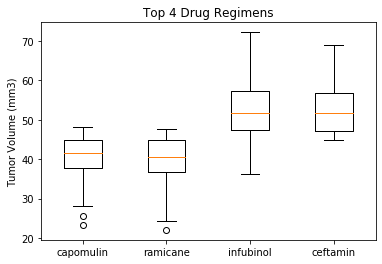

In [10]:
#box plot 
fig1, ax1 = plt.subplots()
ax1.set_title('Top 4 Drug Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(var)
x_axis = (np.arange(len(var)))+1
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, names , rotation="horizontal")
plt.show()

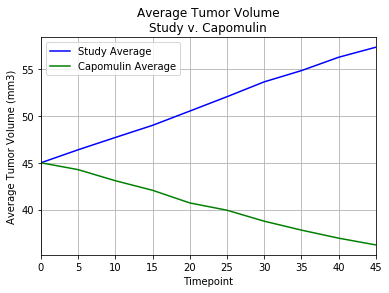

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Capomulin avg tumor over time
cap_tumor_time = regimen_index.loc[["Capomulin"],["Tumor Volume (mm3)","Timepoint"]]
grouped_ctt = cap_tumor_time.groupby("Timepoint")
cap_avg = grouped_ctt["Tumor Volume (mm3)"].mean()
#AVG tumor for the study at each timepoint
grouped_time = mousestudy_df.groupby("Timepoint")
avg_tumor = grouped_time["Tumor Volume (mm3)"].mean()
#Time points
time = mousestudy_df["Timepoint"].unique()

#study average plot
study_avg, = plt.plot(time,avg_tumor, color = 'b', label = "Study Average")
#Cap Average plot
ctt_avg, = plt.plot(time,cap_avg,color = 'g', label = "Capomulin Average")

#Aes 
plt.legend(handles=[study_avg,ctt_avg], loc="best")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.title("Average Tumor Volume\nStudy v. Capomulin")
plt.xlim(0,45)
plt.grid()

plt.show()
plt.tight_layout()






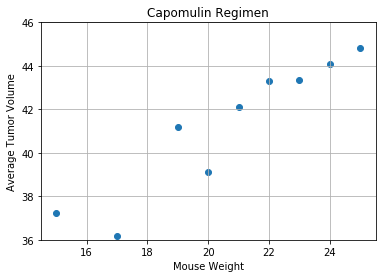

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_tumor_weight = regimen_index.loc[["Capomulin"],["Weight (g)","Tumor Volume (mm3)"]]
grouped_ctw = cap_tumor_weight.groupby("Weight (g)")


x_values = cap_tumor_weight["Weight (g)"].unique()
y_values = grouped_ctw["Tumor Volume (mm3)"].mean()
plt.scatter(x_values,y_values)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title("Capomulin Regimen")
plt.ylim(36,46)
plt.grid()

plt.show()
plt.tight_layout()

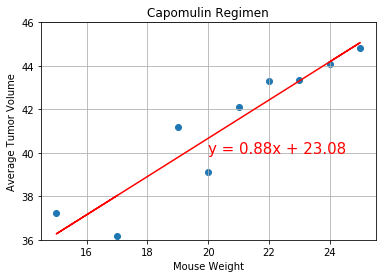

<Figure size 432x288 with 0 Axes>

In [15]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = cap_tumor_weight["Weight (g)"].unique()
y_values = grouped_ctw["Tumor Volume (mm3)"].mean()
(slope, intercept, rvalue, pvalue, stderr) = sem.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title("Capomulin Regimen")
plt.ylim(36,46)
plt.grid()


plt.show()
plt.tight_layout()